In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging
import xgboost as xgb
from sklearn import svm
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
input_csv = '../model_training/csv/dataset.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:   ID                                               text     class  \
0   1  benefit advocate supervisor summary represent ...  ADVOCATE   
1   1  b'john h. smith p.h.r.\n800 991 5187 | po box ...        HR   
2   2  b'name surname\naddress\nmobile email\npersona...        HR   
3   2  vzw customer tech advocate overview flexible i...  ADVOCATE   
4   3  b'anthony brown\nhr assistant\nareas expertise...        HR   

   class_number  senior  
0             1       2  
1            19       2  
2            19       1  
3             1       2  
4            19       1  


In [4]:
df['text_class_number'] = df['text'] + ' ' + df['class_number'].astype(str)
vectorizer = TfidfVectorizer(dtype=np.float64)
X = vectorizer.fit_transform(df['text_class_number'])
y = df['senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None, stratify=y)


In [5]:
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    correct_sum = sum(conf_mat[i][i] for i in range(conf_mat.shape[0]))
    incorrect_sum = sum(sum(row) for row in conf_mat) - correct_sum
    print(f"Correct predictions: {correct_sum}")
    print(f"Incorrect predictions: {incorrect_sum}")
    plt.figure(figsize=(20, 10)) 
    plt.imshow(conf_mat, interpolation='nearest', cmap='Purples')
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    labels = ['Junior', 'Pleno', 'Senior']
    plt.xticks(range(conf_mat.shape[1]), labels)
    plt.yticks(range(conf_mat.shape[0]), labels)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="red")
    
    plt.show()

In [6]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)
  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)
  plt.ylabel('Accuracies')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [7]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    X_train = np.abs(X_train)
    X_test = np.abs(X_test)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [8]:
def train_random_forest(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [9]:
def train_bernoulli(X_train, y_train, X_test, y_test):
    clf = BernoulliNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [10]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [11]:
def train_knn(X_train, y_train, X_test, y_test):
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [12]:
def train_xgboost(X_train, y_train, X_test, y_test):
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [13]:
def train_svm(X_train, y_train, X_test, y_test):
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [14]:
def train_xgboost2(X_train, y_train, X_test, y_test):
    clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=1000, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [15]:
def train_catboost(X_train, y_train, X_test, y_test):
    clf = CatBoostClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=1000,
        l2_leaf_reg=0
    )
    clf.fit(X_train, y_train, verbose=0)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)

    return accuracy

Accuracy: 0.5725446428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.39       107
           1       0.53      0.44      0.48       331
           2       0.65      0.71      0.68       458

    accuracy                           0.57       896
   macro avg       0.51      0.52      0.51       896
weighted avg       0.57      0.57      0.57       896

Correct predictions: 513
Incorrect predictions: 383


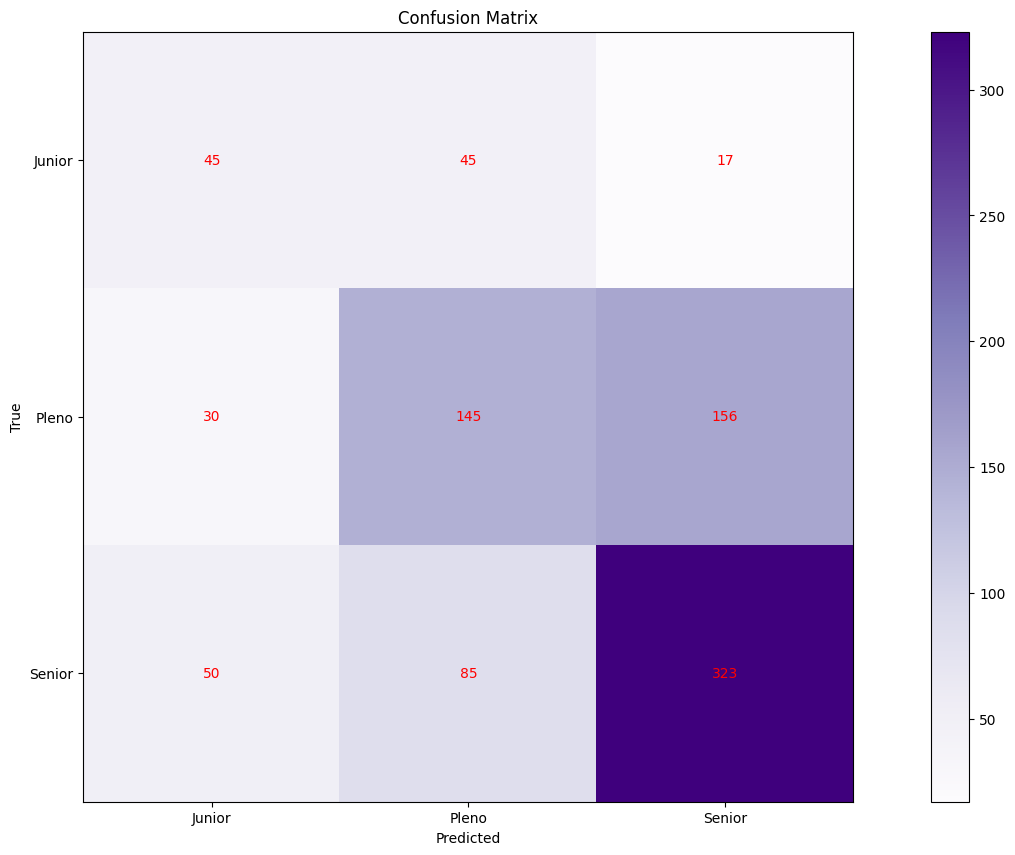

In [16]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)


Accuracy: 0.5424107142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.60      0.11      0.19       331
           2       0.54      0.98      0.69       458

    accuracy                           0.54       896
   macro avg       0.38      0.36      0.30       896
weighted avg       0.50      0.54      0.43       896

Correct predictions: 486
Incorrect predictions: 410


/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vini/dev/cv-indexing/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

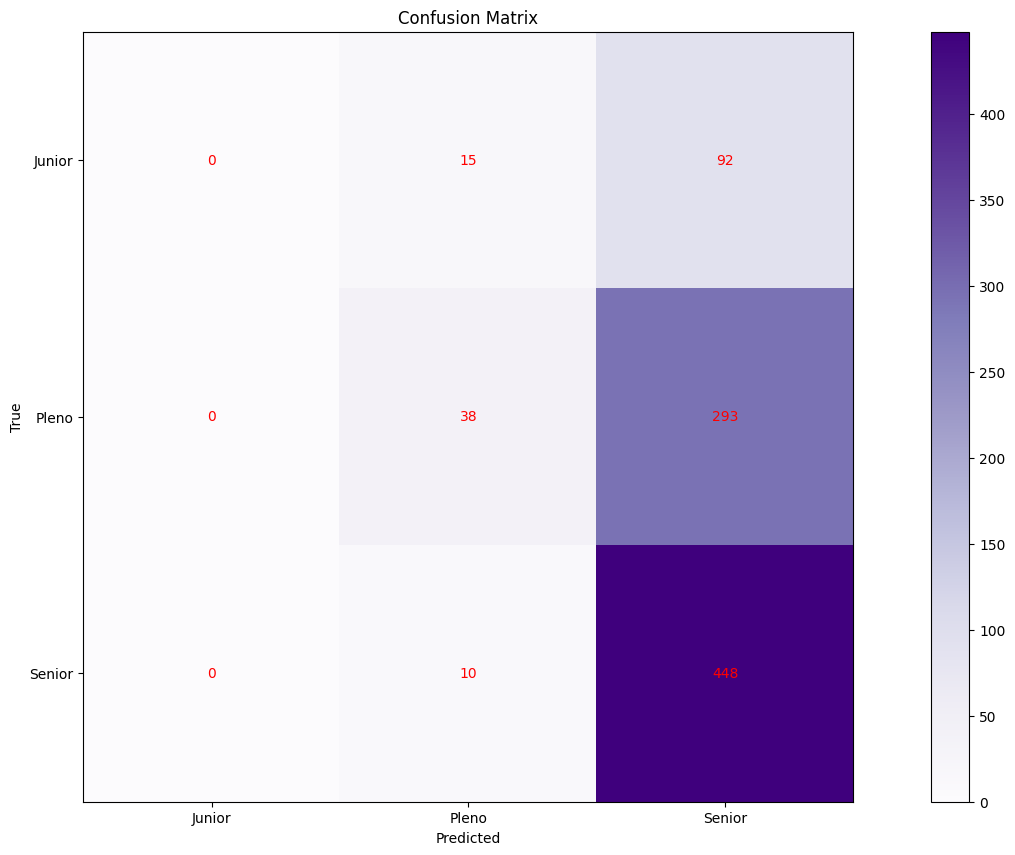

In [17]:
nb_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)


Accuracy: 0.6975446428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.26      0.39       107
           1       0.65      0.57      0.61       331
           2       0.72      0.89      0.80       458

    accuracy                           0.70       896
   macro avg       0.70      0.57      0.60       896
weighted avg       0.70      0.70      0.68       896

Correct predictions: 625
Incorrect predictions: 271


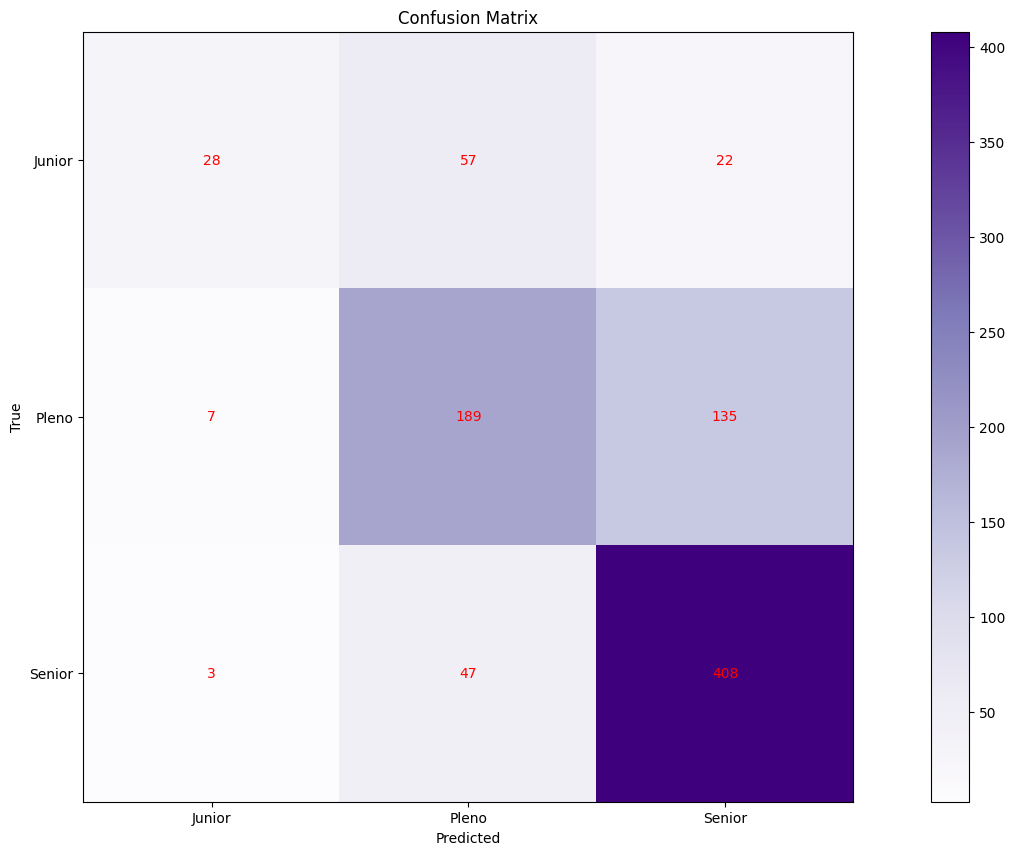

In [18]:
rf_accuracy = train_random_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.7254464285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.37      0.51       107
           1       0.65      0.66      0.65       331
           2       0.77      0.86      0.81       458

    accuracy                           0.73       896
   macro avg       0.74      0.63      0.66       896
weighted avg       0.73      0.73      0.72       896

Correct predictions: 650
Incorrect predictions: 246


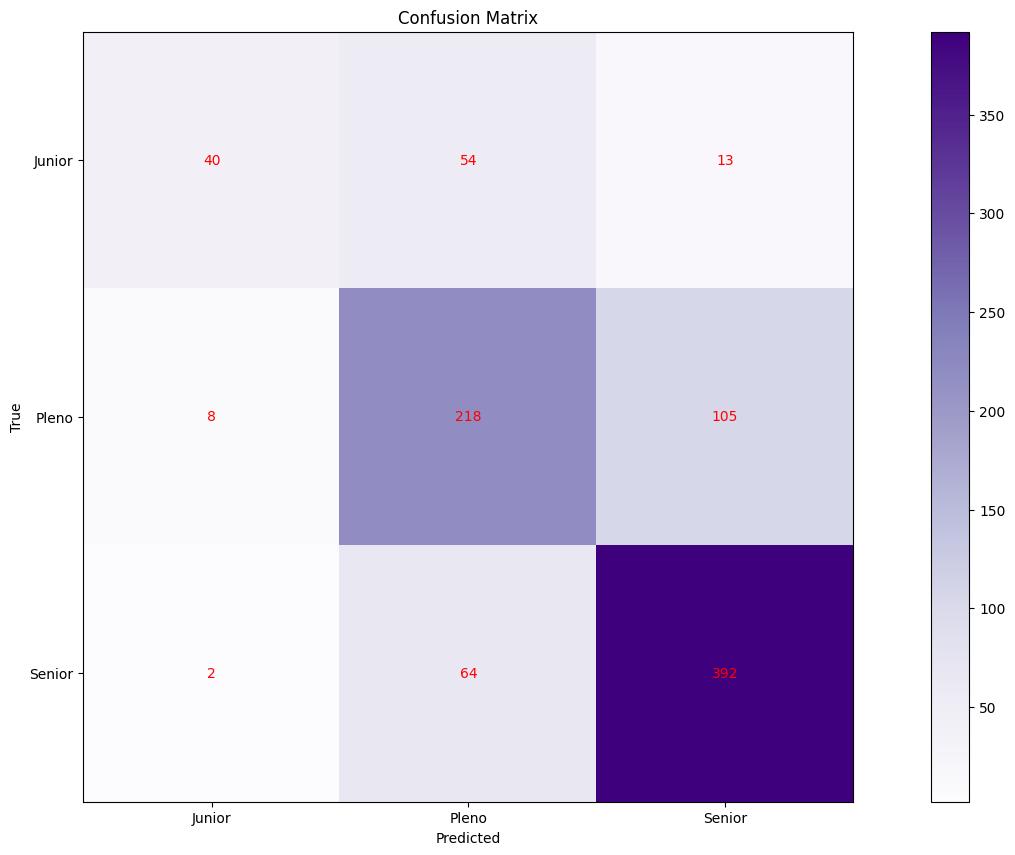

In [19]:
lr_accuracy = train_logistic_regression(X_train, y_train, X_test, y_test)


Accuracy: 0.6741071428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.22      0.31       107
           1       0.57      0.81      0.67       331
           2       0.83      0.68      0.75       458

    accuracy                           0.67       896
   macro avg       0.63      0.57      0.57       896
weighted avg       0.69      0.67      0.67       896

Correct predictions: 604
Incorrect predictions: 292


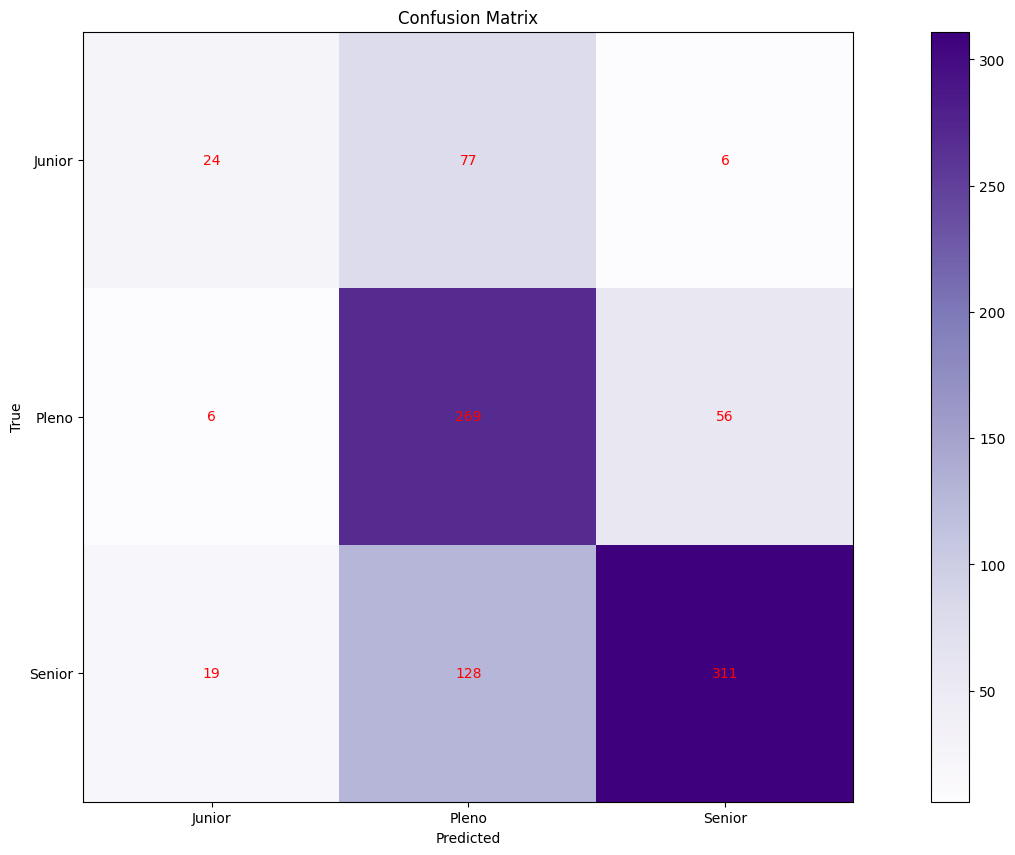

In [20]:
br_accuracy = train_bernoulli(X_train, y_train, X_test, y_test)


Accuracy: 0.7544642857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58       107
           1       0.69      0.74      0.71       331
           2       0.81      0.83      0.82       458

    accuracy                           0.75       896
   macro avg       0.74      0.68      0.70       896
weighted avg       0.75      0.75      0.75       896

Correct predictions: 676
Incorrect predictions: 220


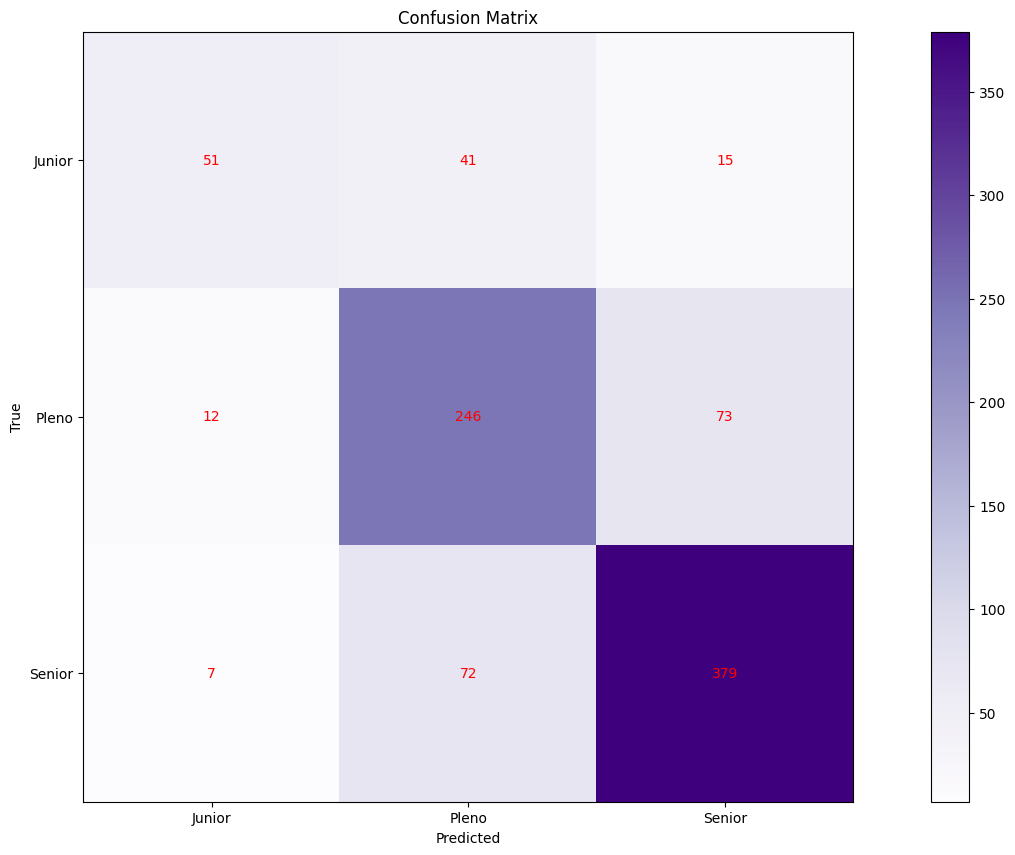

In [21]:
xg_accuracy = train_xgboost(X_train, y_train, X_test, y_test)


Accuracy: 0.7075892857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.33      0.46       107
           1       0.63      0.64      0.64       331
           2       0.75      0.84      0.80       458

    accuracy                           0.71       896
   macro avg       0.71      0.60      0.63       896
weighted avg       0.71      0.71      0.70       896

Correct predictions: 634
Incorrect predictions: 262


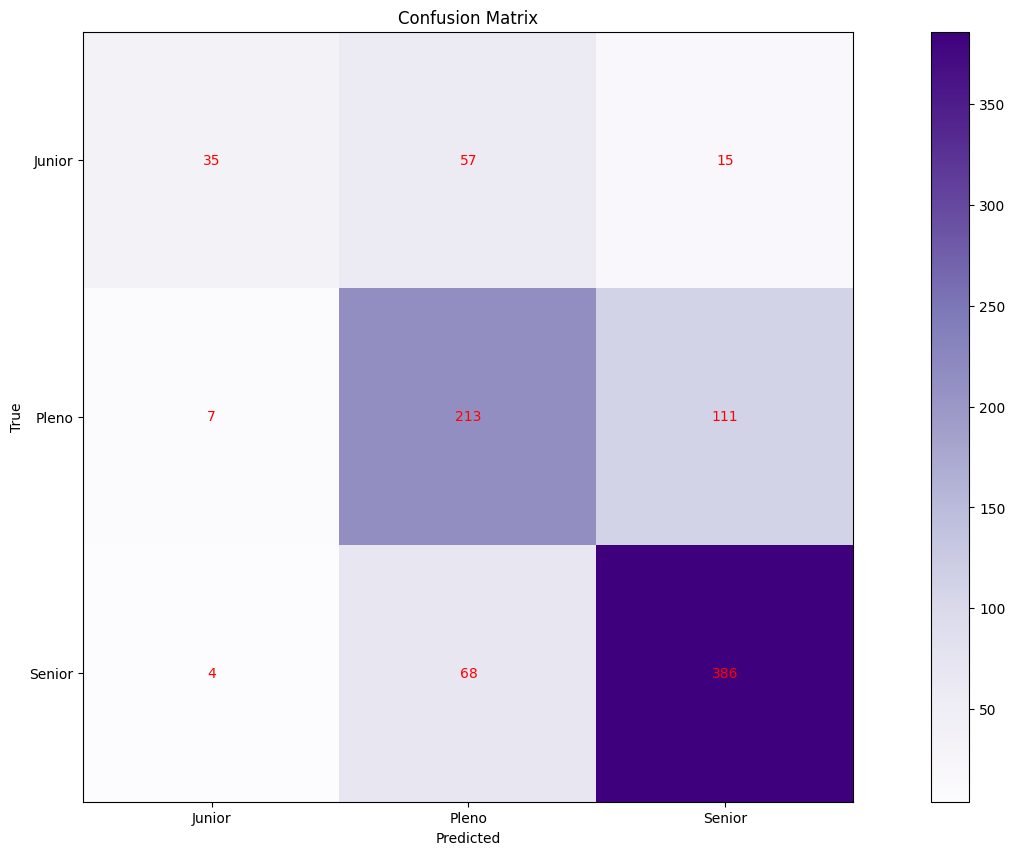

In [22]:
svm_accuracy = train_svm(X_train,y_train,X_test,y_test)


Accuracy: 0.7578125
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       107
           1       0.69      0.72      0.70       331
           2       0.81      0.84      0.82       458

    accuracy                           0.76       896
   macro avg       0.75      0.70      0.72       896
weighted avg       0.76      0.76      0.76       896

Correct predictions: 679
Incorrect predictions: 217


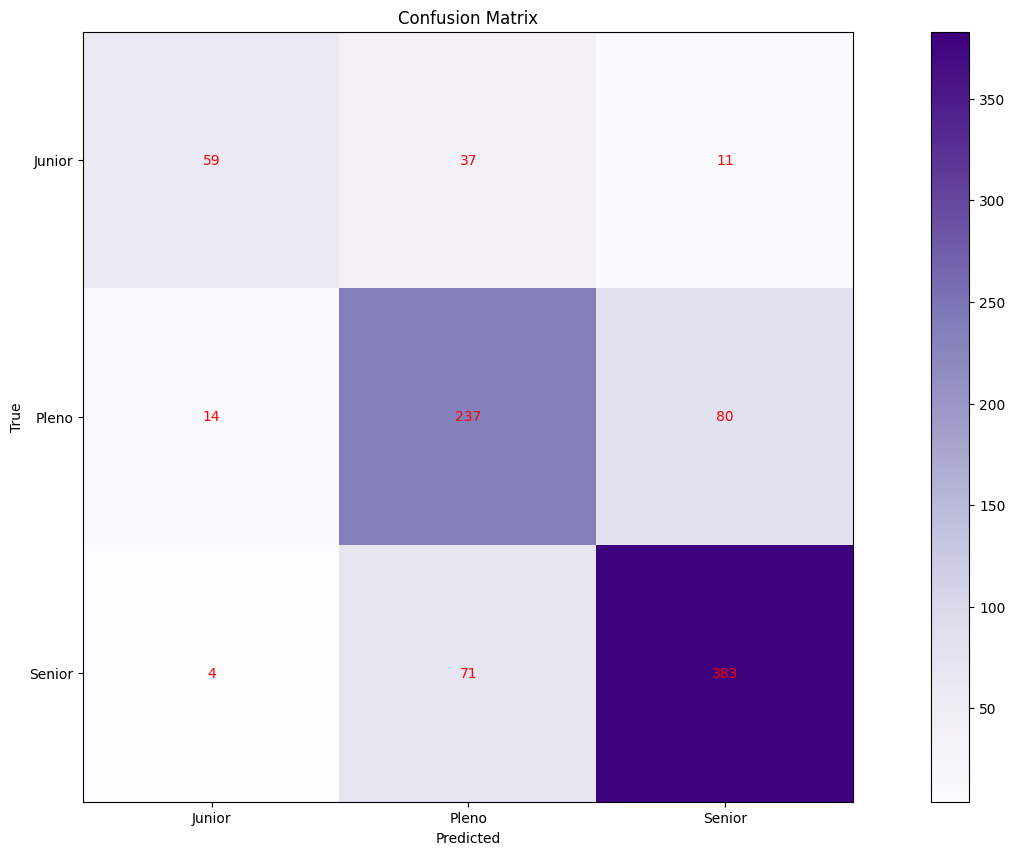

In [23]:
xg_accuracy2 = train_xgboost2(X_train, y_train, X_test, y_test)


Accuracy: 0.7544642857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       107
           1       0.68      0.73      0.70       331
           2       0.81      0.84      0.82       458

    accuracy                           0.75       896
   macro avg       0.75      0.68      0.71       896
weighted avg       0.76      0.75      0.75       896

Correct predictions: 676
Incorrect predictions: 220


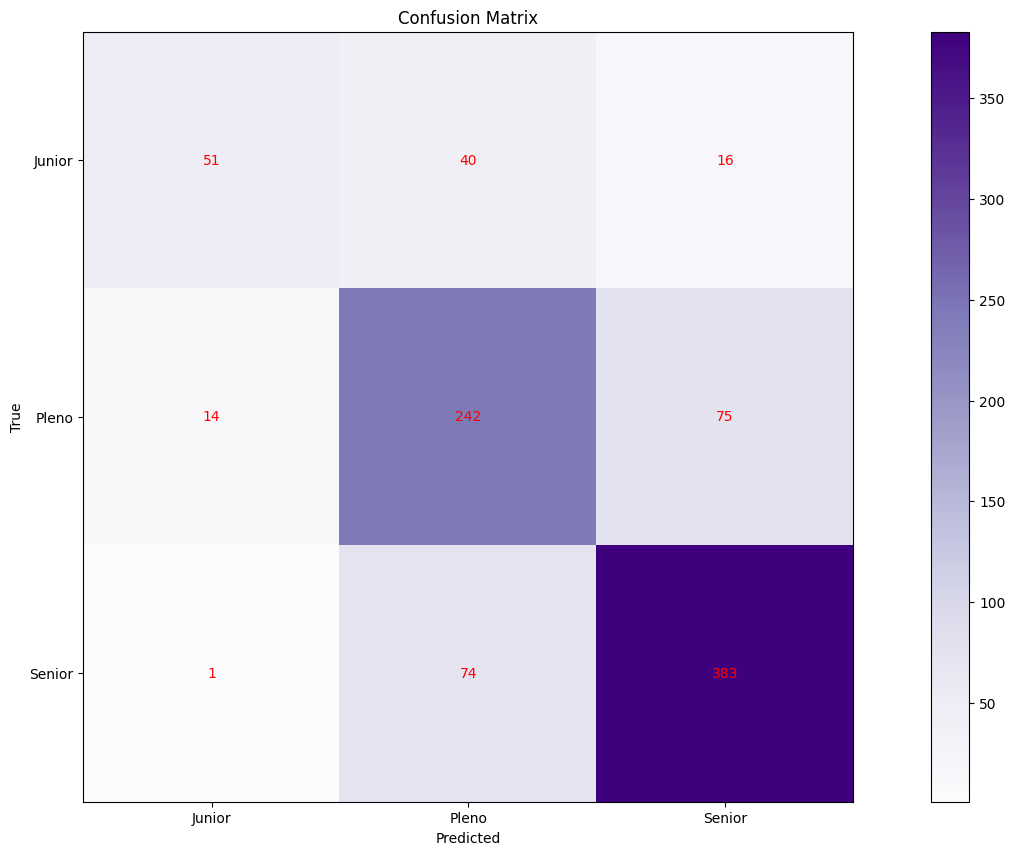

In [24]:
cat_accuracy = train_catboost(X_train,y_train,X_test,y_test)

In [25]:
accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 9': knn_accuracy,
    'XGBoost': xg_accuracy,
    'SVM' : svm_accuracy,
    'XGBoost2' : xg_accuracy2,
    'Cat' : cat_accuracy
}

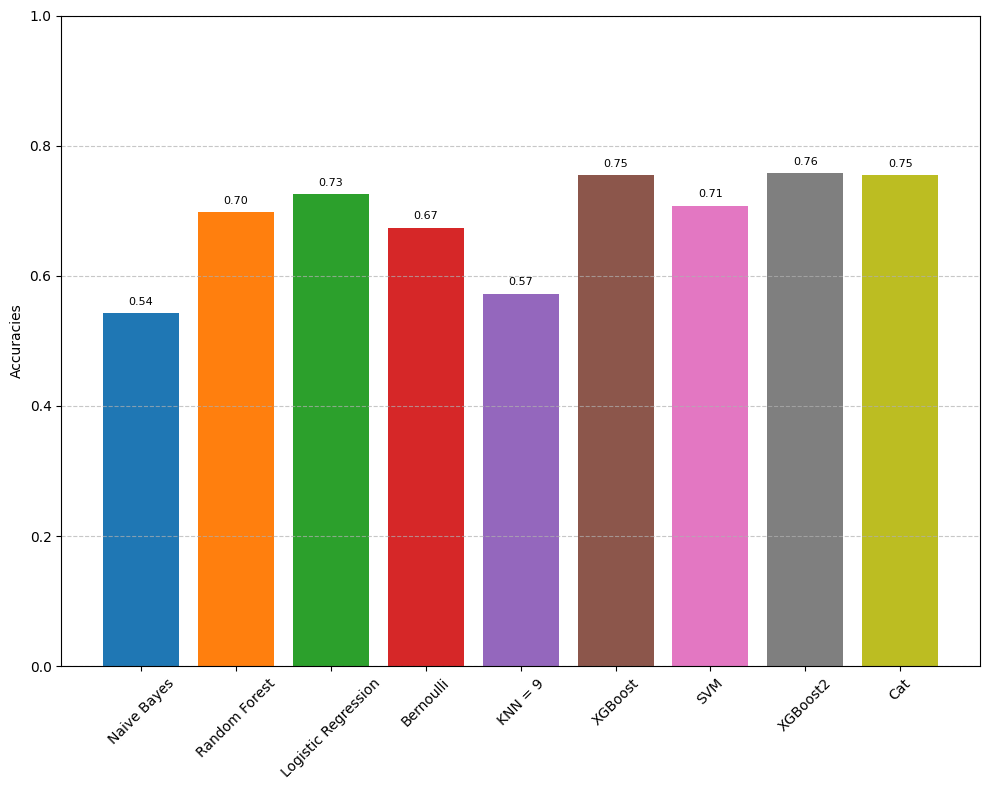

In [26]:
plot_accuracies(accuracies)

In [27]:
def train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    
    accuracies = []
    
    for n in n_neighbors_list:
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_counts, y_train)
        y_pred = clf.predict(X_test_counts)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return accuracies

In [28]:

def plot_accuraciesK(n_neighbors_list, accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors_list, accuracies, marker='o')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN')
    plt.grid(True)
    plt.show()

In [29]:
n_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuraciesK = train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list)

AttributeError: 'csr_matrix' object has no attribute 'lower'

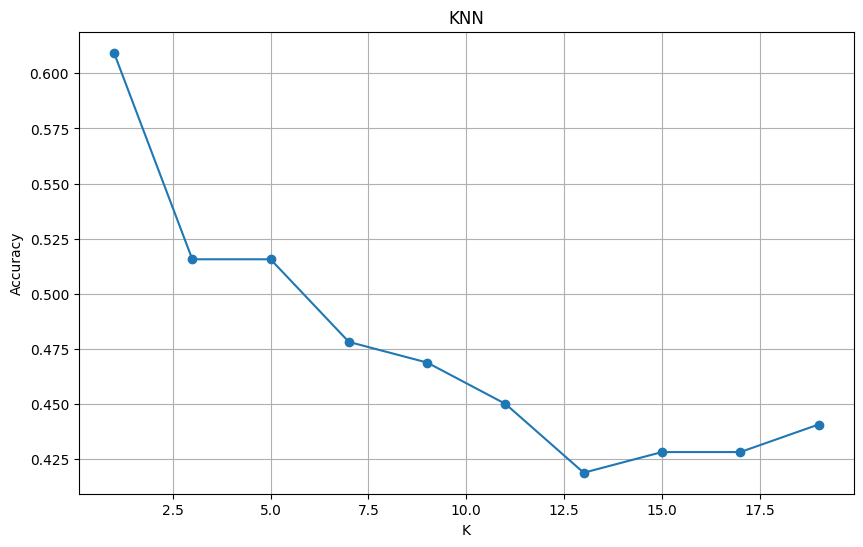

In [ ]:
plot_accuraciesK(n_neighbors_list, accuraciesK)